In [48]:
import tensorflow as tf

# Prepare datasets

In [49]:
from tensorflow.examples.tutorials.mnist import input_data

In [50]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [52]:
mnist.train.images.shape

(55000, 784)

In [53]:
mnist.train.labels.shape

(55000, 10)

In [54]:
mnist.train.num_examples

55000

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
peep_a_image = mnist.train.images[0].reshape(28,28)

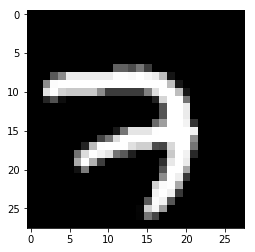

In [57]:
plt.imshow(peep_a_image, cmap='gray')

# Create model

In [58]:
# Placeholders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [59]:
# Variables (weights and bias)
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [60]:
# Create graph operations
y_pred = tf.matmul(x, W) + b

In [61]:
# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true,logits = y_pred))

In [62]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [63]:
# Create session
init = tf.global_variables_initializer()

In [64]:
with tf.Session( ) as sess:
    
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        # only mnist dataset has next_batch function. As general, our own data have to be clean up, reshape, format.
        
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
#   Evaluate the model

    y_pred_number = tf.arg_max(y_pred,1)
    y_true_number = tf.arg_max(y_true,1)
#   arg_max():  Transfer one-hot vector to a real number

    correct_prediction = tf.equal(y_pred_number,y_true_number)
#     [True, False, ...]
    
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
#     tf.cast() : transfer [True, False, ...]----> [1.0 , 0.0 , ....]

    print(sess.run(acc,feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))
    


0.92
